# Predicting diabetes status using NHANES

[DSLC stages]: Analysis



The following code sets up the libraries and creates cleaned and pre-processed training, validation and test data that we will use in this document.

In [55]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import metrics

from functions.load_diabetes_data import load_diabetes_data
# load the diabetes data
diabetes = load_diabetes_data()

pd.set_option('display.max_columns', None)

%run -i 01_cleaning.ipynb

训练集大小: (19499, 12)
验证集大小: (6500, 12)
测试集大小: (6500, 12)
数值 0 出现了 17447 次
数值 1 出现了 2052 次
数值 0 出现了 5798 次
数值 1 出现了 702 次
数值 0 出现了 5772 次
数值 1 出现了 728 次



Fill in this document to complete the diabetes prediction exercise.

### 最小二乘

In [43]:
# 训练最小二乘模型
ls_model = LinearRegression()
ls_model.fit(X_train, y_train)

LinearRegression()

In [44]:
# 在验证集上进行预测
y_val_pred_ls = ls_model.predict(X_val)


thresholds_ls = np.linspace(0, 1, 100)  # 在0到1之间生成100个等间距的阈值

In [45]:
#计算准确率
best_threshold_ls = None
best_accuracy_ls = 0

for threshold in thresholds_ls:
    y_val_pred = ls_model.predict(X_val)
    y_val_pred_thresholded = [1 if pred > threshold else 0 for pred in y_val_pred]
    accuracy = accuracy_score(y_val, y_val_pred_thresholded)
    if accuracy > best_accuracy_ls:
        best_accuracy_ls = accuracy
        best_threshold_ls = threshold

In [46]:
print(best_threshold_ls)
print(best_accuracy_ls)

0.393939393939394
0.8929230769230769


In [47]:
# 设置阈值
threshold_ls = best_threshold_ls  
y_val_pred_ls_thresholded = [1 if pred > threshold_ls else 0 for pred in y_val_pred_ls]

# 计算均方误差（MSE）
mse_ls = mean_squared_error(y_val, y_val_pred_ls_thresholded)
print("最小二乘模型在验证集上的均方误差（阈值为{}）：".format(threshold_ls), mse_ls)

最小二乘模型在验证集上的均方误差（阈值为0.393939393939394）： 0.10707692307692308


In [275]:
# 使用plotly.express绘制散点图
df = pd.DataFrame({'Age': X_val['age'].squeeze(), 'Predicted': y_val_pred_ls_thresholded})
fig = px.scatter(df, x='Age', y='Predicted', title='Actual vs Predicted Values (LS Model with Threshold)')
fig.show()

In [276]:
# 计算混淆矩阵
cm = confusion_matrix(y_val, y_val_pred_ls_thresholded)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
fig = px.imshow(cm_df, text_auto=True, title='Confusion Matrix (Linear Regression Model)')
fig.show()

In [277]:
#from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_ls)
roc_auc = auc(fpr, tpr)

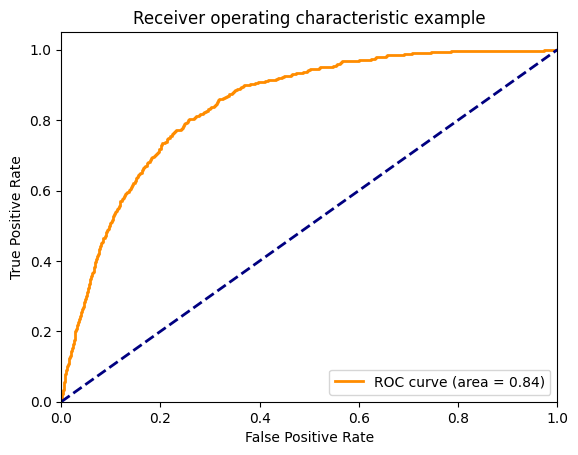

In [278]:
#import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### LS测试集

In [279]:
# 在测试集上进行预测
y_test_pred_ls = ls_model.predict(X_test)

In [280]:
# 设置阈值
#threshold_ls = best_threshold_ls  
y_test_pred_ls_thresholded = [1 if pred > threshold_ls else 0 for pred in y_test_pred_ls]

# 计算均方误差（MSE）
mse_ls = mean_squared_error(y_test, y_test_pred_ls_thresholded)
print("最小二乘模型在测试集上的均方误差（阈值为{}）：".format(threshold_ls), mse_ls)

最小二乘模型在测试集上的均方误差（阈值为0.393939393939394）： 0.10984615384615384


In [281]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_test_pred_ls_thresholded)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
fig = px.imshow(cm_df, text_auto=True, title='Confusion Matrix (Linear Regression Model)')
fig.show()

In [282]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_ls)
roc_auc = auc(fpr, tpr)

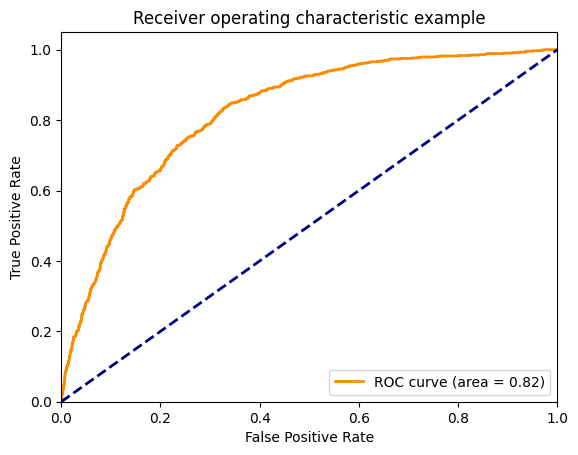

In [283]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 逻辑回归

In [76]:
# 训练逻辑回归模型
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

d:\Anaconda3\envs\basic\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [77]:
cfm = confusion_matrix(y_val, logit_model.predict(X_val))
cfm

array([[5787,   11],
       [ 699,    3]])

In [78]:
# 在验证集上进行预测
y_val_pred_logit = logit_model.predict_proba(X_val)[:,1]


In [79]:

# 计算准确率
accuracy_logit = accuracy_score(y_val, logit_model.predict(X_val))
print("逻辑回归模型在验证集上的准确率：", accuracy_logit)

逻辑回归模型在验证集上的准确率： 0.8907692307692308


In [80]:
# 计算混淆矩阵
cm_logit = confusion_matrix(y_val, logit_model.predict(X_val))
cm_df_logit = pd.DataFrame(cm_logit, index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
fig = px.imshow(cm_df_logit, text_auto=True, title='Confusion Matrix (Logistic Regression Model)')
fig.show()

In [82]:
#from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_logit)
roc_auc = auc(fpr, tpr)

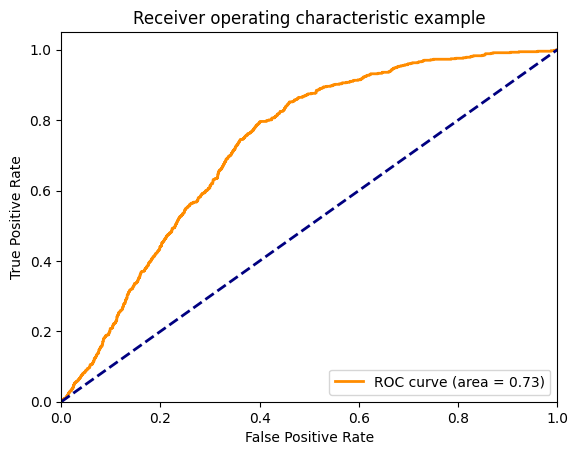

In [84]:
#import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 逻辑回归测试集

In [85]:
# 在测试集上进行预测
y_test_pred_logit = logit_model.predict_proba(X_test)

In [86]:
# 计算准确率
accuracy_logit = accuracy_score(y_test, logit_model.predict(X_test))
print("逻辑回归模型在验证集上的准确率：", accuracy_logit)

逻辑回归模型在验证集上的准确率： 0.8861538461538462


In [87]:
#计算混淆矩阵
cfm = confusion_matrix(y_test, logit_model.predict(X_test))
cfm

array([[5757,   15],
       [ 725,    3]])

In [144]:
# 计算混淆矩阵
cm_logit = confusion_matrix(y_test, logit_model.predict(X_test))
cm_df_logit = pd.DataFrame(cm_logit, index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
fig = px.imshow(cm_df_logit, text_auto=True, title='Confusion Matrix (Logistic Regression Model)')
fig.show()

In [88]:
#from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_logit[:,1])
roc_auc = auc(fpr, tpr)

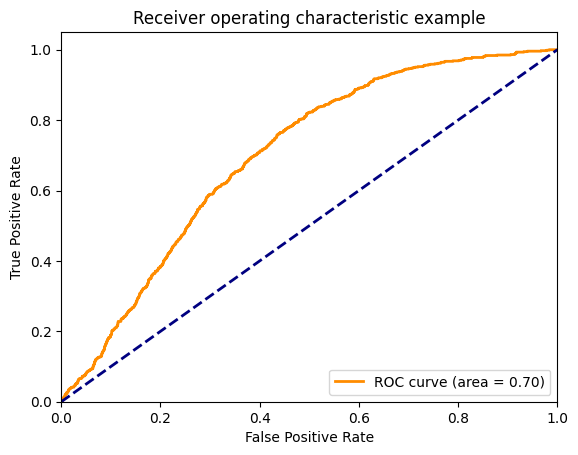

In [89]:
#import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 随机森林

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [98]:
# 建立随机森林
rfc = RandomForestClassifier(n_estimators=100, random_state=90)

#用交叉验证计算得分
score_pre = cross_val_score(rfc, X_val, y_val, cv=10).mean()
score_pre

np.float64(0.8869230769230769)

最大得分：0.8872307692307693 子树数量为：71


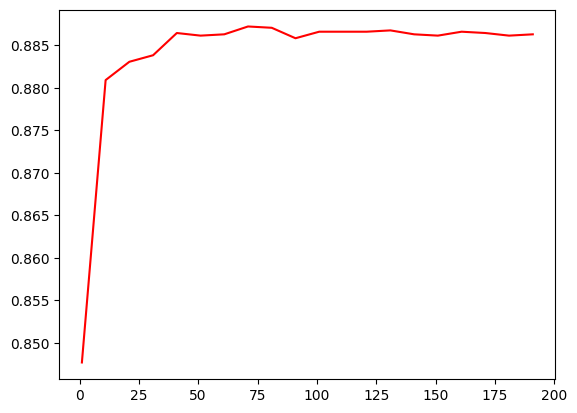

In [99]:
# 调参，绘制学习曲线来调参n_estimators（对随机森林影响最大）
score_lt = []

# 每隔10步建立一个随机森林，获得不同n_estimators的得分
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, X_val, y_val, cv=10).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('最大得分：{}'.format(score_max),
      '子树数量为：{}'.format(score_lt.index(score_max)*10+1))

# 绘制学习曲线
x = np.arange(1,201,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()

最大得分：0.8878461538461538 子树数量为：60


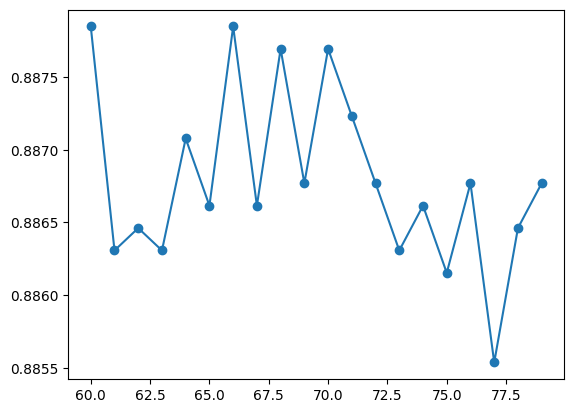

In [100]:
# 在71附近缩小n_estimators的范围为60-79
score_lt = []
for i in range(60,80):
    rfc = RandomForestClassifier(n_estimators=i
                                ,random_state=90)
    score = cross_val_score(rfc, X_val, y_val, cv=10).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('最大得分：{}'.format(score_max),
      '子树数量为：{}'.format(score_lt.index(score_max)+60))

# 绘制学习曲线
x = np.arange(60,80)
plt.subplot(111)
plt.plot(x, score_lt,'o-')
plt.show()

In [101]:
# 建立n_estimators为60的随机森林
rfc = RandomForestClassifier(n_estimators=60, random_state=90)

# 用网格搜索调整max_depth
param_grid = {'max_depth':np.arange(1,20)}
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(X_val, y_val)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

{'max_depth': np.int64(5)} 0.8926153846153847


In [102]:
# 用网格搜索调整max_features
param_grid = {'max_features':np.arange(3,31)}

rfc = RandomForestClassifier(n_estimators=60
                            ,random_state=90
                            ,max_depth=5)
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(X_val, y_val)
best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)    

{'max_features': np.int64(8)} 0.8952307692307693


In [104]:
rf = RandomForestClassifier(n_estimators=60, max_depth=5, max_features=8, random_state=90)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=8, n_estimators=60,
                       random_state=90)

In [ ]:
y_val_pred_rf = rf.predict_proba(X_val)
accuracy = rf.score(X_val, y_val)
print("Accuracy:", accuracy)

Accuracy: 0.8941538461538462


In [97]:
y_val_pred_rf

array([[0.94272641, 0.05727359],
       [0.60513031, 0.39486969],
       [0.57872159, 0.42127841],
       ...,
       [0.9908222 , 0.0091778 ],
       [0.94027955, 0.05972045],
       [0.68827614, 0.31172386]], shape=(6500, 2))

In [300]:
cfm = confusion_matrix(y_val, rf.predict(X_val))
cfm

array([[5785,   13],
       [ 675,   27]])

In [301]:
#from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_rf[:,1])
roc_auc = auc(fpr, tpr)

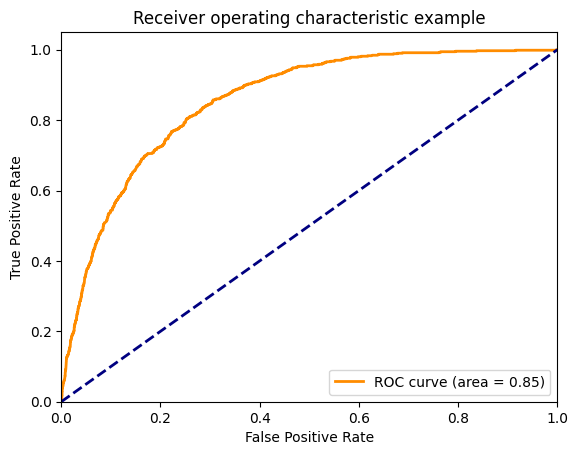

In [302]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 随机森林测试集

In [303]:
y_test_pred_rf = rf.predict_proba(X_test)
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8898461538461538


In [304]:
cfm = confusion_matrix(y_test, rf.predict(X_test))
cfm

array([[5759,   13],
       [ 703,   25]])

In [146]:
# 计算混淆矩阵
cm_rf = confusion_matrix(y_test, rf.predict(X_test))
cm_df_rf = pd.DataFrame(cm_rf, index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
fig = px.imshow(cm_df_rf, text_auto=True, title='Confusion Matrix (Random Forest)')
fig.show()

In [305]:
#from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_rf[:,1])
roc_auc = auc(fpr, tpr)

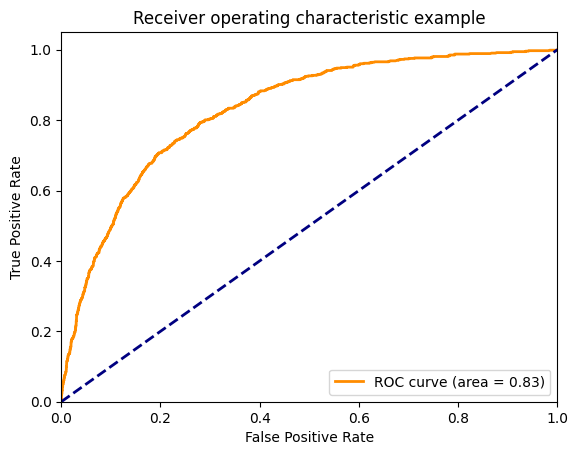

In [306]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### GBDT

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")


# 建立GBDT
gbdt = GradientBoostingClassifier(n_estimators=100, random_state=90)

# 用交叉验证计算得分
score_pre = cross_val_score(gbdt, X_val, y_val, cv=10).mean()
print(score_pre)


0.8910769230769231


最大得分：0.8938461538461537 子树数量为：41


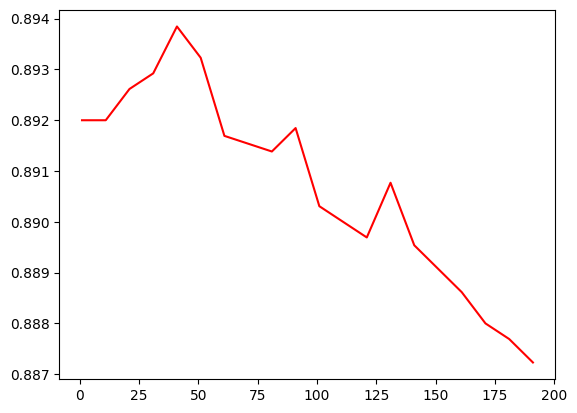

In [310]:

# 调参，绘制学习曲线来调参n_estimators（对GBDT影响最大）
score_lt = []

# 每隔10步建立一个GBDT，获得不同n_estimators的得分
for i in range(0, 200, 10):
    gbdt = GradientBoostingClassifier(n_estimators=i + 1, random_state=90)
    score = cross_val_score(gbdt, X_val, y_val, cv=10).mean()
    score_lt.append(score)

score_max = max(score_lt)
print('最大得分：{}'.format(score_max),
      '子树数量为：{}'.format(score_lt.index(score_max) * 10 + 1))

# 绘制学习曲线
x = np.arange(1, 201, 10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()


最大得分：0.8946153846153846 子树数量为：42


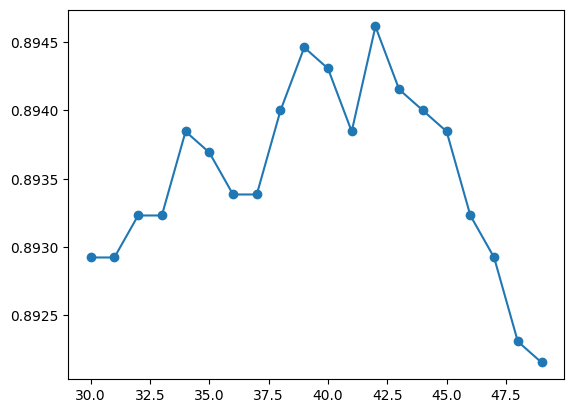

In [311]:

# 在41附近缩小n_estimators的范围为30 - 49
score_lt = []
for i in range(30, 50):
    gbdt = GradientBoostingClassifier(n_estimators=i, random_state=90)
    score = cross_val_score(gbdt, X_val, y_val, cv=10).mean()
    score_lt.append(score)

score_max = max(score_lt)
print('最大得分：{}'.format(score_max),
      '子树数量为：{}'.format(score_lt.index(score_max) + 30))

# 绘制学习曲线
x = np.arange(30, 50)
plt.subplot(111)
plt.plot(x, score_lt, 'o-')
plt.show()


In [312]:

# 建立n_estimators为42的GBDT
gbdt = GradientBoostingClassifier(n_estimators=42, random_state=90)

# 用网格搜索调整max_depth
param_grid = {'max_depth': np.arange(1, 20)}
GS = GridSearchCV(gbdt, param_grid, cv=10)
GS.fit(X_val, y_val)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)


{'max_depth': np.int64(2)} 0.8955384615384615


In [313]:
# 用网格搜索调整learning_rate
param_grid = {'learning_rate': np.arange(0.01, 1, 0.05)}

gbdt = GradientBoostingClassifier(n_estimators=42, random_state=90, max_depth=2)
GS = GridSearchCV(gbdt, param_grid, cv=10)
GS.fit(X_val, y_val)
best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

{'learning_rate': np.float64(0.11)} 0.8949230769230769


In [148]:
# 创建GBDT模型
gbdt = GradientBoostingClassifier(n_estimators=42, learning_rate=0.11, max_depth=2, random_state=90)

# 训练模型
gbdt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.11, max_depth=2, n_estimators=42,
                           random_state=90)

In [316]:
y_val_pred_gbdt = gbdt.predict_proba(X_val)
accuracy = gbdt.score(X_val, y_val)
print("Accuracy:", accuracy)

Accuracy: 0.8938461538461538


In [317]:
cfm = confusion_matrix(y_val, gbdt.predict(X_val))
cfm

array([[5761,   37],
       [ 653,   49]])

In [318]:
#from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_gbdt[:,1])
roc_auc = auc(fpr, tpr)

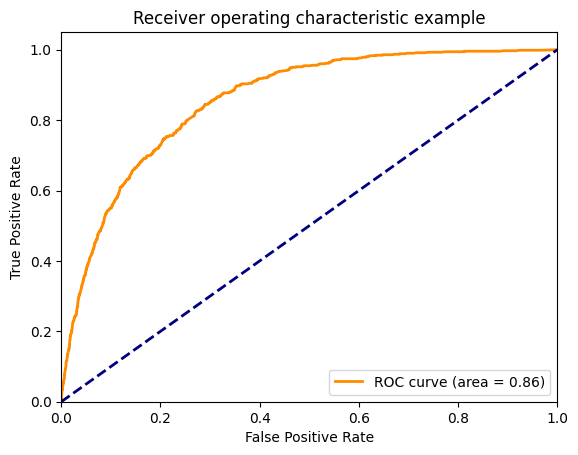

In [319]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### GBDT测试集

In [320]:
y_test_pred_gbdt = gbdt.predict_proba(X_test)
accuracy = gbdt.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8910769230769231


In [321]:
cfm = confusion_matrix(y_test, gbdt.predict(X_test))
cfm

array([[5735,   37],
       [ 671,   57]])

In [149]:
# 计算混淆矩阵
cm_gbdt = confusion_matrix(y_test, gbdt.predict(X_test))
cm_df_gbdt = pd.DataFrame(cm_gbdt, index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
fig = px.imshow(cm_df_gbdt, text_auto=True, title='Confusion Matrix (GBDT)')
fig.show()

In [322]:
#from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_gbdt[:,1])
roc_auc = auc(fpr, tpr)

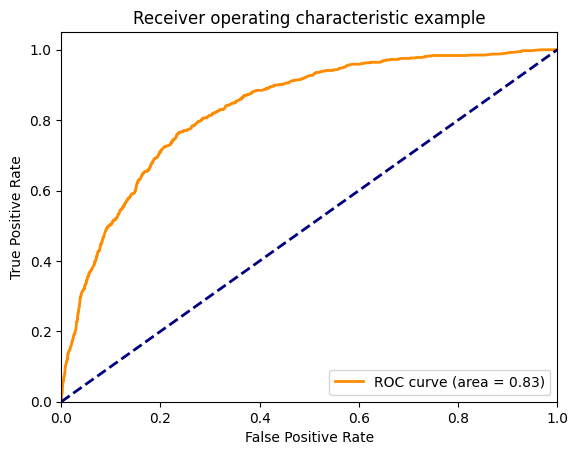

In [323]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [153]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# 假设这是之前的四个混淆矩阵的数据
cm_linear = np.array([[5729, 43], [671, 57]])
cm_logistic = np.array([[5757, 15], [725, 3]])
cm_rf = np.array([[5759, 13], [703, 25]])
cm_gbdt = np.array([[5735, 37], [671, 57]])


# 定义标签
labels = ['Linear Regression', 'Logistic Regression', 'Random Forest', 'GBDT']


# 创建子图
fig, axs = plt.subplots(2, 2, figsize=(10, 10))


# 绘制线性回归混淆矩阵
axs[0, 0].imshow(cm_linear, interpolation='nearest', cmap=plt.cm.Reds)
axs[0, 0].set_title('Confusion Matrix (Linear Regression)')
axs[0, 0].set_xticks([0, 1])
axs[0, 0].set_yticks([0, 1])
axs[0, 0].set_xticklabels(['Predicted Negative', 'Predicted Positive'])
axs[0, 0].set_yticklabels(['Actual Negative', 'Actual Positive'])
for i in range(2):
    for j in range(2):
        axs[0, 0].text(j, i, cm_linear[i, j], ha="center", va="center", color="k")


# 绘制逻辑回归混淆矩阵
axs[0, 1].imshow(cm_logistic, interpolation='nearest', cmap=plt.cm.Reds)
axs[0, 1].set_title('Confusion Matrix (Logistic Regression)')
axs[0, 1].set_xticks([0, 1])
axs[0, 1].set_yticks([0, 1])
axs[0, 1].set_xticklabels(['Predicted Negative', 'Predicted Positive'])
axs[0, 1].set_yticklabels(['Actual Negative', 'Actual Positive'])
for i in range(2):
    for j in range(2):
        axs[0, 1].text(j, i, cm_logistic[i, j], ha="center", va="center", color="k")


# 绘制随机森林混淆矩阵
axs[1, 0].imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Reds)
axs[1, 0].set_title('Confusion Matrix (Random Forest)')
axs[1, 0].set_xticks([0, 1])
axs[1, 0].set_yticks([0, 1])
axs[1, 0].set_xticklabels(['Predicted Negative', 'Predicted Positive'])
axs[1, 0].set_yticklabels(['Actual Negative', 'Actual Positive'])
for i in range(2):
    for j in range(2):
        axs[1, 0].text(j, i, cm_rf[i, j], ha="center", va="center", color="k")


# 绘制GBDT混淆矩阵
axs[1, 1].imshow(cm_gbdt, interpolation='nearest', cmap=plt.cm.Reds)
axs[1, 1].set_title('Confusion Matrix (GBDT)')
axs[1, 1].set_xticks([0, 1])
axs[1, 1].set_yticks([0, 1])
axs[1, 1].set_xticklabels(['Predicted Negative', 'Predicted Positive'])
axs[1, 1].set_yticklabels(['Actual Negative', 'Actual Positive'])
for i in range(2):
    for j in range(2):
        axs[1, 1].text(j, i, cm_gbdt[i, j], ha="center", va="center", color="k")


# 添加全局标题
fig.suptitle('Confusion Matrices of Four Models')


# 调整子图布局
plt.tight_layout()


# 显示图形
plt.show()

## PCS 

### ROC curve

In [307]:
from sklearn import metrics 

In [326]:
# compute the ROC curve variables
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve(y_test, y_test_pred_logit[:,1])
ls_fpr, ls_tpr, ls_thresholds = metrics.roc_curve(y_test, y_test_pred_ls)
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, y_test_pred_rf[:,1])
gbdt_fpr, gbdt_tpr, gbdt_thresholds = metrics.roc_curve(y_test, y_test_pred_gbdt[:,1])

roc_lr = pd.DataFrame({
    'False Positive Rate': lr_fpr,
    'True Positive Rate': lr_tpr,
    'Model': 'Logistic Regression'
}, index=lr_thresholds)

roc_ls = pd.DataFrame({
    'False Positive Rate': ls_fpr,
    'True Positive Rate': ls_tpr,
    'Model': 'LS'
}, index=ls_thresholds)

roc_rf = pd.DataFrame({
    'False Positive Rate': rf_fpr,
    'True Positive Rate': rf_tpr,
    'Model': 'RF'
}, index=rf_thresholds)

roc_gbdt = pd.DataFrame({
    'False Positive Rate': gbdt_fpr,
    'True Positive Rate': gbdt_tpr,
    'Model': 'GBDT'
}, index=gbdt_thresholds)

roc_df = pd.concat([roc_lr, roc_ls, roc_rf, roc_gbdt])


px.line(roc_df, y='True Positive Rate', x='False Positive Rate',
        color='Model',
        width=700, height=500
)

### Stability to data perturbations

In [7]:
# new clean function for this part
def data_clean_and_preprocess_perturb(diabetes_o, limit_process=False, smoker_process=False, unknown_process =False, standard = False):
    #Clean the numberic variables
    diabetes = diabetes_o.copy()
    if limit_process:
        diabetes["high age"]=(diabetes["age"]== 85)
        diabetes["high weight"]=(diabetes["weight"]== 996)
        diabetes["high height"]=(diabetes["height"] == 96)
        diabetes["high bmi"]=(diabetes["bmi"] == 9995)
        for i in diabetes.index:
            if diabetes.loc[i]["height"] == 96:
                diabetes.at[i,"height"]= 77
            if diabetes.loc[i]["weight"] == 996:
                diabetes.at[i,"weight"]= 300
    else:
        #"age">=85 means the individual's age is uncertain
        diabetes = diabetes[diabetes["age"]!=85]
        #"bmi"= 9999 means the individual doesn't know his "bmi"
        diabetes = diabetes[diabetes["bmi"] != 9995]
        #"weight"> 299 means the individual's weight can't be record
        diabetes = diabetes[diabetes["weight"] != 996]
        #"height">76 or < 59 means the individual's height cannot be recorded
        diabetes = diabetes[diabetes["height"] != 96]

    if unknown_process:
        dbt_copy= diabetes.copy()
        dbt_copy =dbt_copy[dbt_copy["age"]<=84]
        dbt_copy= dbt_copy[dbt_copy["bmi"]<= 9994]
        dbt_copy =dbt_copy[(dbt_copy["weight"]<=299)&(dbt_copy["weight"]>= 100)]
        dbt_copy = dbt_copy[(dbt_copy["height"]<=76)&(dbt_copy["height"] >= 59)]
        means = dbt_copy.drop(columns=["house_family_person_id"]).mean()
        std = dbt_copy.drop(columns =["house_family_person_id"]).std()
        for i in diabetes.index:
            if diabetes.loc[i]["height"] > 96:
                diabetes.at[i,"height"]= int(np.random.normal(means["height"], std["height"]))
            if diabetes.loc[i]["bmi"] == 9999:
                diabetes.at[i,"bmi"]= int(np.random.normal(means["bmi"], std["bmi"]))
            if diabetes.loc[i]["weight"] > 996:
                diabetes.at[i,"weight"]= int(np.random.normal(means["weight"], std["weight"]))
    else:
        #"bmi" = 9999 means the individual doesn't know his "bmi"
        diabetes = diabetes[diabetes["bmi"]<= 9994]
        #"weight"> 299 means the individual's weight can't be record
        diabetes = diabetes[(diabetes["weight"]<=299)&(diabetes["weight"]>= 100)]
        #the individual's "height">76 or <59 can't be record
        diabetes =diabetes[(diabetes["height"]<= 76)&(diabetes["height"]>= 59)]

    if standard:
        means = diabetes.drop(columns =["house_family_person_id"]).mean()
        std = diabetes.drop(columns=["house_family_person_id"]).std()
        diabetes["height"]=(diabetes["height"]-means["height"])/std["height"]
        diabetes["weight"]=(diabetes["weight"]-means["weight"])/std["weight"]
        diabetes["bmi"]=(diabetes["bmi"]-means["bmi"])/std["bmi"]
        diabetes["age"]=(diabetes["age"]-means["age"])/std["age"]
        
    #Clean the category variables
    #"smoker"!= 1 or 2 means the individual didn't provide certain information
    if smoker_process:
        diabetes["smoke"]= diabetes["smoker"] == 1
        diabetes["no smoke"]= diabetes["smoker"] == 2
        diabetes["unsure smoke"]= diabetes["smoker"] >= 7
        diabetes = diabetes.drop(columns=["smoker"])
    else:
        diabetes = diabetes[diabetes["smoker"]<= 2]
        diabetes["smoker"]= diabetes["smoker"] - 1


    diabetes.dropna()
    diabetes["sex"]= diabetes["sex"]-1

    return diabetes

In [12]:
cleaned_data

house_family_person_id  diabetes  age  smoker  sex  \
0                      1_2_1         0   24       1    1   
1                      2_1_1         0   76       1    0   
2                      3_1_2         0   36       1    1   
3                      5_1_1         0   35       0    1   
4                     10_1_5         0   20       1    1   
...                      ...       ...  ...     ...  ...   
32494              71559_1_1         0   56       0    0   
32495              71565_1_1         0   58       0    0   
32496              71569_1_1         1   71       0    1   
32497              71576_1_1         0   64       0    0   
32498              71579_1_1         0   54       1    0   

       coronary_heart_disease  weight   bmi  height  hypertension  \
0                           0     125  2019      66             0   
1                           0     190  2727      70             1   
2                           0     225  3862      64             0   
3                           0     240  3995      65             0   
4                           0     103  1883      62             0   
...                       ...     ...   ...     ...           ...   
32494                       0     172  2399      71             0   
32495                       0     225  3141      71             1   
32496                       1     124  2501      59             1   
32497                       0     188  2945      67             1   
32498                       0     200  2790      71             1   

       heart_condition  cancer  family_history_diabetes  
0                    0       0                        0  
1                    0       0                        0  
2                    0       0                        1  
3                    0       0                        1  
4                    0       0                        1  
...                ...     ...                      ...  
32494                0       1                        1  
32495                0       0                        1  
32496                0       0                        1  
32497                0       0                        0  
32498                0       0                        0  

[28451 rows x 13 columns]

In [31]:

# 划分训练集和临时集（用于进一步划分测试集和验证集）
train_data, test_val = train_test_split(diabetes, test_size=0.4, random_state=66)

# 进一步划分临时集为测试集和验证集
test_data, val_data = train_test_split(test_val, test_size=0.5, random_state=66)

print("训练集大小:", train_data.shape)
print("测试集大小:", test_data.shape)
print("验证集大小:", val_data.shape)

训练集大小: (19499, 13)
测试集大小: (6500, 13)
验证集大小: (6500, 13)


In [32]:
train_data

house_family_person_id  diabetes  age  smoker  sex  \
22185              48517_1_1         1   61       1    1   
16198              35422_1_1         0   19       2    1   
24683              54130_1_2         0   56       1    1   
12772              28041_1_1         0   50       2    2   
16556              36216_1_1         0   25       2    2   
...                      ...       ...  ...     ...  ...   
29818              65628_1_2         1   53       2    2   
8243               18230_1_2         1   50       2    1   
8823               19436_1_2         0   58       2    2   
25404              55763_1_1         0   83       2    2   
25620              56316_1_1         0   55       1    1   

       coronary_heart_disease  weight   bmi  height  hypertension  \
22185                       0     225  3230      70             1   
16198                       0     128  2198      64             0   
24683                       0     145  2343      66             0   
12772                       0     230  4491      60             0   
16556                       0     130  2305      63             0   
...                       ...     ...   ...     ...           ...   
29818                       0     231  3410      69             1   
8243                        0     280  4017      70             0   
8823                        0     195  3347      64             0   
25404                       0     182  2851      67             1   
25620                       1     245  3232      73             1   

       heart_condition  cancer  family_history_diabetes  
22185                1       0                        1  
16198                0       0                        0  
24683                0       0                        1  
12772                0       0                        0  
16556                0       0                        0  
...                ...     ...                      ...  
29818                0       0                        1  
8243                 0       0                        1  
8823                 0       0                        1  
25404                0       1                        0  
25620                1       0                        0  

[19499 rows x 13 columns]

In [33]:
dbt_train_bost = [train_data.sample(frac=1,replace=True)for i in range(100)]
dbt_train_bost_std =[]
for i in range(100):
    dbt_train_bost_std.append(data_clean_and_preprocess_perturb(dbt_train_bost[i], False, False, False, True))
    dbt_train_bost[i]= clean_data(dbt_train_bost[i])

In [34]:
dbt_train_ptb =[]
dbt_val_ptb =[]
dbt_test_ptb =[]
dbt_train_ptb_label=[]
dbt_val_ptb_label=[]
dbt_test_ptb_label =[]
for i in [False,True]:
    for j in [False,True]:
        for k in [False,True]:
            for l in [False,True]:
                dbt_train_i = data_clean_and_preprocess_perturb(train_data.copy(),i,j, k, l)
                dbt_val_i = data_clean_and_preprocess_perturb(val_data.copy(),i, j, k, l)
                dbt_test_i= data_clean_and_preprocess_perturb(test_data.copy(),i, j, k, l)



                dbt_train_ptb_label.append(dbt_train_i["diabetes"])
                dbt_val_ptb_label.append(dbt_val_i["diabetes"])
                dbt_test_ptb_label.append(dbt_test_i["diabetes"])
                dbt_train_ptb.append(dbt_train_i.drop(columns = ["house_family_person_id","diabetes"]))
                dbt_val_ptb.append(dbt_val_i.drop(columns = ["house_family_person_id","diabetes"]))
                dbt_test_ptb.append(dbt_test_i.drop(columns =["house_family_person_id","diabetes"]))

In [35]:
dbt_train_bost[1]

house_family_person_id  diabetes  age  smoker  sex  \
21960              48020_1_1         0   43       0    0   
6087               13595_1_1         0   63       0    1   
16101              35195_1_1         0   60       0    0   
1791                3987_1_1         0   55       1    0   
32481              71536_1_1         0   57       1    1   
...                      ...       ...  ...     ...  ...   
30086              66186_1_1         0   80       0    0   
14274              31331_1_1         0   49       0    0   
1427                3161_1_2         0   38       1    0   
6320               14068_1_1         0   82       0    1   
31009              68210_1_1         0   23       1    0   

       coronary_heart_disease  weight   bmi  height  hypertension  \
21960                       0     270  3662      72             1   
6087                        1     155  2834      62             1   
16101                       0     208  3069      69             1   
1791                        0     220  2983      72             0   
32481                       0     105  1800      64             0   
...                       ...     ...   ...     ...           ...   
30086                       0     204  3010      69             1   
14274                       0     192  2604      72             0   
1427                        0     180  2655      69             0   
6320                        1     180  2994      65             1   
31009                       0     140  2009      70             0   

       heart_condition  cancer  family_history_diabetes  
21960                0       0                        0  
6087                 0       0                        1  
16101                0       0                        0  
1791                 0       0                        1  
32481                0       0                        1  
...                ...     ...                      ...  
30086                0       1                        0  
14274                0       0                        0  
1427                 0       0                        0  
6320                 1       1                        0  
31009                0       0                        0  

[17046 rows x 13 columns]

In [36]:
dbt_train_bost_label=[]
for i in range(100):
    dbt_train_bost_label.append(dbt_train_bost[i]["diabetes"])
    dbt_train_bost[i]= dbt_train_bost[i].drop(columns = ["house_family_person_id","diabetes"])
    dbt_train_bost_std[i] = dbt_train_bost_std[i].drop(columns = ["house_family_person_id","diabetes"])

In [40]:
# 定义特征和目标变量
X_val_ptb = val_data.drop(["diabetes","house_family_person_id"], axis=1)  # 特征，去掉目标变量列
y_val_ptb = val_data["diabetes"]  # 目标变量

## LS

In [41]:
Ls_bost = [LinearRegression().fit(dbt_train_bost[i], dbt_train_bost_label[i]) for i in range(100)]

In [50]:
Ls_bost_pred = [model.predict(X_val_ptb) for model in Ls_bost]
Ls_bost_pred_label = [ pred > threshold_ls for pred in Ls_bost_pred]

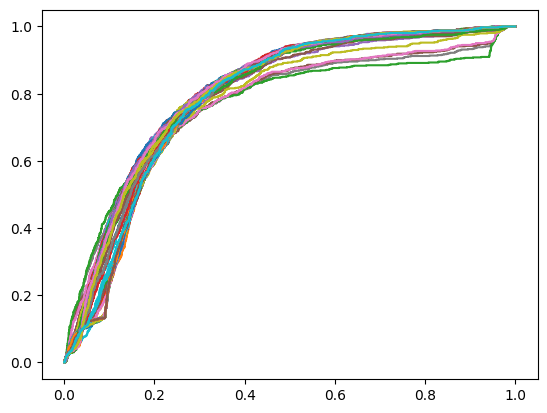

In [ ]:
#roc
for i in range(100):
    roc_ls_bost = roc_curve(y_val_ptb, Ls_bost_pred[i])
    plt.plot(roc_ls_bost[0], roc_ls_bost[1])

In [56]:
tpr_bost_ls = [metrics.recall_score(y_val_ptb, pred>threshold_ls) for pred in Ls_bost_pred]
acc_bost_ls = [metrics.accuracy_score(y_val_ptb, pred>threshold_ls) for pred in Ls_bost_pred]
tnr_bost_ls = [metrics.recall_score(y_val_ptb, pred>threshold_ls, pos_label=0) for pred in Ls_bost_pred]

In [58]:
ls_tp_df = pd.DataFrame(dict(tp_rate = tpr_bost_ls ,model = 'Ls'))
px.box(pd.concat([ls_tp_df]),x='model', y='tp_rate', title='True positive rate')

In [59]:
ls_tn_df = pd.DataFrame(dict(tn_rate = tnr_bost_ls, model = 'Ls'))
px.box(pd.concat([ls_tn_df]),x='model', y='tn_rate', title='True negative rate')

In [60]:
ls_acc_df = pd.DataFrame(dict(acc =acc_bost_ls, model ='Ls'))
px.box(pd.concat([ls_acc_df]),x='model',y='acc',title='Accuracy')

In [61]:
Ls_bost_std = [LinearRegression().fit(dbt_train_bost_std[i], dbt_train_bost_label[i]) for i in range(100)]

In [64]:
#变量系数
Ls_bost_cof_std = pd.DataFrame([x.coef_ for x in Ls_bost_std])
Ls_bost_cof_std.columns = dbt_train_bost_std[0].columns 
Ls_bost_cof_std.head()

age    smoker       sex  coronary_heart_disease    weight       bmi  \
0  0.031070 -0.008715 -0.002191                0.119286  0.043669 -0.002707   
1  0.034745  0.011459 -0.001202                0.177741  0.025148  0.011516   
2  0.035421 -0.001690 -0.007383                0.129697  0.033038  0.003270   
3  0.030372 -0.007475  0.001216                0.147489  0.020484  0.019234   
4  0.030780  0.003058 -0.008254                0.113218  0.039846  0.004269   

     height  hypertension  heart_condition    cancer  family_history_diabetes  
0 -0.016021      0.092429         0.035438  0.024825                 0.095073  
1 -0.008777      0.088254         0.032587  0.015595                 0.111566  
2 -0.012942      0.097194         0.039643  0.012383                 0.117900  
3 -0.008499      0.093930         0.028669  0.005139                 0.100786  
4 -0.020855      0.101494         0.048204  0.020534                 0.096640

In [ ]:
#系数箱型图
# Sort the columns based on the absolute values of the coefficients
sorted_columns =Ls_bost_cof_std.abs() \
    .mean() \
    .sort_values(ascending=False) \
    .head(20) \
    .index
# Create the boxplot with the sorted columns
fig = px.box(Ls_bost_cof_std[sorted_columns], title='Ls')
fig.update_yaxes(title_text='standardized coefficient')

In [66]:
Ls_ptb =[]
for i in range(16):
    Ls_ptb_i= LinearRegression().fit(dbt_train_ptb[i], dbt_train_ptb_label[i])
    Ls_ptb_probs = Ls_ptb_i.predict(dbt_val_ptb[i])
    
    Ls_ptb.append([Ls_ptb_i, Ls_ptb_probs])

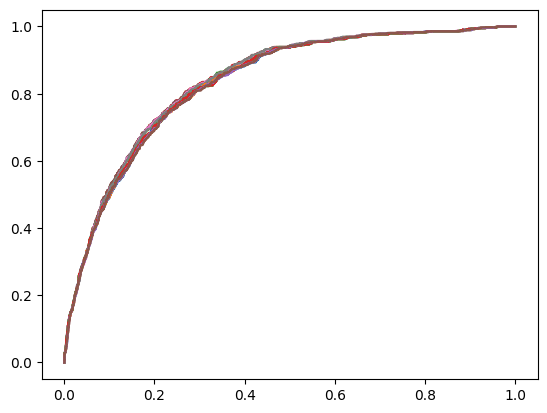

In [67]:
#扰动roc
for i in range(16):
    roc_ls_ptb =roc_curve(dbt_val_ptb_label[i], Ls_ptb[i][1])
    plt.plot(roc_ls_ptb[0], roc_ls_ptb[1])

In [70]:
tpr_ptb_ls = [metrics.recall_score(dbt_val_ptb_label[i], Ls_ptb[i][1]>threshold_ls)for i in range(16)]
acc_ptb_ls = [metrics.accuracy_score(dbt_val_ptb_label[i],Ls_ptb[i][1]>threshold_ls) for i in range(16)]
tnr_ptb_ls = [metrics.recall_score(dbt_val_ptb_label[i], Ls_ptb[i][1]>threshold_ls, pos_label=0) for i in range(16)]

In [71]:
ls_tp_ptb = pd.DataFrame(dict(tp_rate = tpr_ptb_ls ,model = 'Ls'))
px.box(pd.concat([ls_tp_ptb]),x='model', y='tp_rate', title='True positive rate')

In [72]:
ls_tn_ptb = pd.DataFrame(dict(tn_rate = tnr_ptb_ls, model = 'Ls'))
px.box(pd.concat([ls_tn_ptb]),x='model', y='tn_rate', title='True negative rate')

In [74]:
ls_acc_ptb =pd.DataFrame(dict(acc = acc_ptb_ls, model ='LS'))
px.box(pd.concat([ls_acc_ptb]), x='model', y='acc', title='Accuracy')

## RF

In [91]:
#RandomForestClassifier(n_estimators=60, max_depth=5, max_features=8, random_state=90)
rf_bost = [RandomForestClassifier(n_estimators=60, max_depth=5, max_features=8, random_state=90).fit(dbt_train_bost[i], dbt_train_bost_label[i]) for i in range(100)]

In [94]:
rf_bost_pred = [model.predict_proba(X_val_ptb) for model in rf_bost]


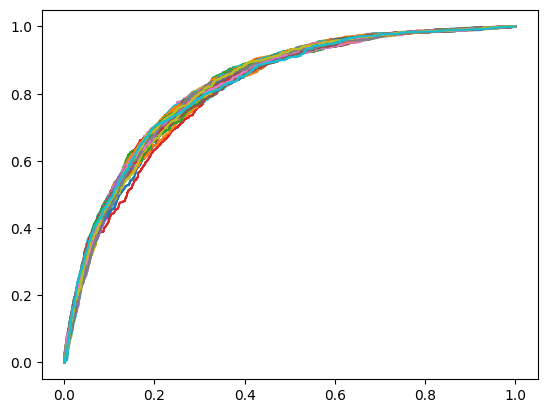

In [96]:
for i in range(100):
    roc_rf_bost = roc_curve(y_val_ptb, rf_bost_pred[i][:,1])
    plt.plot(roc_rf_bost[0], roc_rf_bost[1])

In [110]:
tpr_bost_rf = [metrics.recall_score(y_val_ptb, pred[:,1]>0.5) for pred in rf_bost_pred]
acc_bost_rf = [metrics.accuracy_score(y_val_ptb, pred[:,1]>0.5) for pred in rf_bost_pred]
tnr_bost_rf = [metrics.recall_score(y_val_ptb, pred[:,1]>0.5, pos_label=0) for pred in rf_bost_pred]

In [112]:
rf_tp_df = pd.DataFrame(dict(tp_rate = tpr_bost_rf ,model = 'RF'))
px.box(pd.concat([rf_tp_df]),x='model', y='tp_rate', title='True positive rate')

In [113]:
rf_tn_df = pd.DataFrame(dict(tn_rate = tnr_bost_ls, model = 'RF'))
px.box(pd.concat([rf_tn_df]),x='model', y='tn_rate', title='True negative rate')

In [114]:
rf_acc_df = pd.DataFrame(dict(acc =acc_bost_ls, model ='RF'))
px.box(pd.concat([rf_acc_df]),x='model',y='acc',title='Accuracy')

In [115]:
rf_bost_std = [RandomForestClassifier(n_estimators=60, max_depth=5, max_features=8, random_state=90).fit(dbt_train_bost_std[i], dbt_train_bost_label[i]) for i in range(100)]

In [117]:
if hasattr(rf_bost_std[0], 'feature_importances_'):
    rf_boost_coef_std = pd.DataFrame([x.feature_importances_ for x in rf_bost_std])
    rf_boost_coef_std.columns = dbt_train_bost_std[0].columns
    print(rf_boost_coef_std.head())
else:
    print("模型不支持获取系数或特征重要性")

        age    smoker       sex  coronary_heart_disease    weight       bmi  \
0  0.202727  0.007852  0.004635                0.037601  0.092734  0.121169   
1  0.179740  0.001261  0.002263                0.091873  0.069701  0.100859   
2  0.168776  0.003856  0.002864                0.044909  0.062249  0.096058   
3  0.164717  0.003021  0.001453                0.050865  0.058352  0.153667   
4  0.165999  0.002231  0.002025                0.028843  0.039412  0.156718   

     height  hypertension  heart_condition    cancer  family_history_diabetes  
0  0.013287      0.311308         0.007091  0.002728                 0.198870  
1  0.011609      0.285166         0.004439  0.003313                 0.249776  
2  0.009969      0.337149         0.009884  0.008573                 0.255712  
3  0.011861      0.315185         0.009750  0.003848                 0.227281  
4  0.017393      0.361003         0.010409  0.003720                 0.212247  


In [124]:
#系数箱型图
# Sort the columns based on the absolute values of the coefficients
sorted_columns =rf_boost_coef_std.abs() \
    .mean() \
    .sort_values(ascending=False) \
    .head(20) \
    .index
# Create the boxplot with the sorted columns
fig = px.box(rf_boost_coef_std[sorted_columns], title='RF')
fig.update_yaxes(title_text='standardized coefficient')

In [130]:
rf_ptb =[]
for i in range(16):
    rf_ptb_i= RandomForestClassifier(n_estimators=60, max_depth=5, max_features=8, random_state=90).fit(dbt_train_ptb[i], dbt_train_ptb_label[i])
    rf_ptb_probs = rf_ptb_i.predict_proba(dbt_val_ptb[i])[:,1]
    
    rf_ptb.append([rf_ptb_i, rf_ptb_probs])

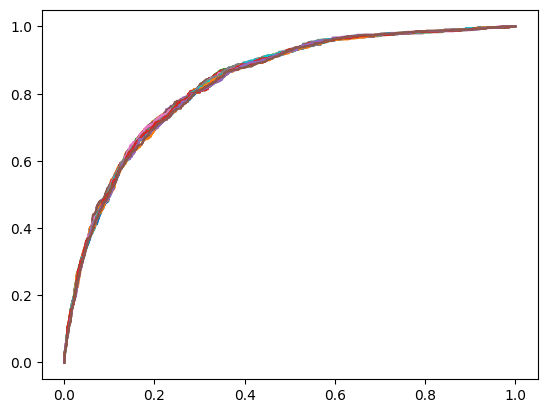

In [132]:
#扰动roc
for i in range(16):
    roc_rf_ptb =roc_curve(dbt_val_ptb_label[i], rf_ptb[i][1])
    plt.plot(roc_rf_ptb[0], roc_rf_ptb[1])

## GBDT

In [135]:
#GradientBoostingClassifier(n_estimators=42, learning_rate=0.11, max_depth=2, random_state=90)
gbdt_bost = [GradientBoostingClassifier(n_estimators=42, learning_rate=0.11, max_depth=2, random_state=90).fit(dbt_train_bost[i], dbt_train_bost_label[i]) for i in range(100)]

In [136]:
gbdt_bost_pred = [model.predict_proba(X_val_ptb) for model in gbdt_bost]


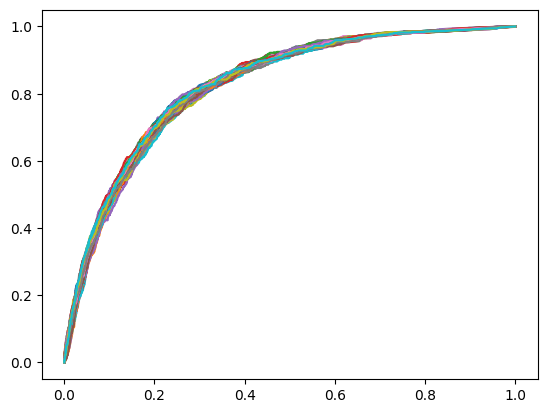

In [138]:
for i in range(100):
    roc_gbdt_bost = roc_curve(y_val_ptb, gbdt_bost_pred[i][:,1])
    plt.plot(roc_gbdt_bost[0], roc_gbdt_bost[1])

In [139]:
gbdt_bost_std = [GradientBoostingClassifier(n_estimators=42, learning_rate=0.11, max_depth=2, random_state=90).fit(dbt_train_bost_std[i], dbt_train_bost_label[i]) for i in range(100)]

In [140]:
if hasattr(gbdt_bost_std[0], 'feature_importances_'):
    gbdt_boost_coef_std = pd.DataFrame([x.feature_importances_ for x in gbdt_bost_std])
    gbdt_boost_coef_std.columns = dbt_train_bost_std[0].columns
    print(gbdt_boost_coef_std.head())
else:
    print("模型不支持获取系数或特征重要性")

        age    smoker       sex  coronary_heart_disease    weight       bmi  \
0  0.196930  0.005186  0.000000                0.063612  0.070376  0.123544   
1  0.184454  0.000000  0.000000                0.121816  0.024178  0.116935   
2  0.185349  0.002880  0.003437                0.060975  0.043026  0.106189   
3  0.162028  0.000725  0.001072                0.084176  0.043652  0.148782   
4  0.160724  0.000000  0.003138                0.054559  0.035430  0.155560   

     height  hypertension  heart_condition    cancer  family_history_diabetes  
0  0.000000      0.328110         0.006540  0.000000                 0.205703  
1  0.002407      0.276544         0.002594  0.004248                 0.266823  
2  0.002746      0.322819         0.007827  0.000000                 0.264752  
3  0.000000      0.325761         0.006603  0.000874                 0.226327  
4  0.001072      0.366179         0.012288  0.000000                 0.211050  


In [154]:
#系数箱型图
# Sort the columns based on the absolute values of the coefficients
sorted_columns =gbdt_boost_coef_std.abs() \
    .mean() \
    .sort_values(ascending=False) \
    .head(20) \
    .index
# Create the boxplot with the sorted columns
fig = px.box(gbdt_boost_coef_std[sorted_columns], title='GBDT')
fig.update_yaxes(title_text='standardized coefficient')

In [142]:
gbdt_ptb =[]
for i in range(16):
    gbdt_ptb_i= GradientBoostingClassifier(n_estimators=42, learning_rate=0.11, max_depth=2, random_state=90).fit(dbt_train_ptb[i], dbt_train_ptb_label[i])
    gbdt_ptb_probs = gbdt_ptb_i.predict_proba(dbt_val_ptb[i])[:,1]
    
    gbdt_ptb.append([gbdt_ptb_i, gbdt_ptb_probs])

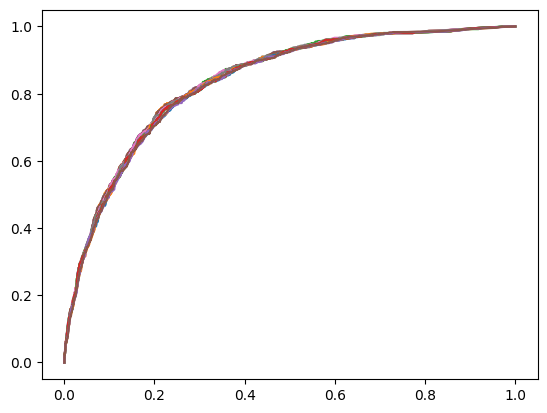

In [143]:
#扰动roc
for i in range(16):
    roc_gbdt_ptb =roc_curve(dbt_val_ptb_label[i], gbdt_ptb[i][1])
    plt.plot(roc_gbdt_ptb[0], roc_gbdt_ptb[1])